In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_russia_ukrain_war.csv')

dataset

,author,updated_at,like_count,text,public
0,@SeanMckeag,2024-04-10T13:35:12Z,1,i already know topic us long time ag real teac...,True
1,@serbrat,2024-04-10T12:23:36Z,0,a fake russian version history beginning midddle,True
2,@sergeilopuchin7605,2024-04-09T23:25:02Z,0,failed mention uss support maidan coup,True
3,@ian2372,2024-04-09T05:05:06Z,1,ukraine russia soviets created ukraine ukraine...,True
4,@hlgshm,2024-04-08T20:16:19Z,1,bs,True
...,...,...,...,...,...
76942,@alessandro3997,2024-03-28T14:58:05Z,10,spoiler ability doesnt exist,True
76943,@Presidentofmusic,2024-03-28T14:56:51Z,16,lost bro sad story,True
76944,@PhilipMarcYT,2024-03-28T14:53:17Z,304,already lost russia admit tired,True
76945,@DeadCat-42,2024-03-28T14:53:13Z,6,putins ego trip caused much suffering,True


In [3]:
dataset.dropna(subset=['text'], inplace=True)
# Reset the index after dropping rows
dataset.reset_index(drop=True, inplace=True)

In [4]:
dataset.isnull().sum()

author        6
updated_at    0
like_count    0
text          0
public        0
dtype: int64

In [5]:
print(" ")
print(dataset['text'][1666])

 
bad lesson belarus exist th century learn i report video


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
#Only include those words that appear in less than 80% of the document (max_df=0.8)
#Only include those words that ppear in at least 2 documents
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
#.values Only the values in the DataFrame will be returned, the axes labels will be removed.
#The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).
doc_term_matrix = count_vect.fit_transform(dataset['text'].values.astype('U'))

In [7]:
doc_term_matrix


<71544x25191 sparse matrix of type '<class 'numpy.int64'>'
	with 782151 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
#n_components = num. of topics
#random_state = Is just random
LDA = LatentDirichletAllocation(n_components=10, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(random_state=42)

In [ ]:

#https://stackoverflow.com/questions/61373994/how-to-specify-random-state-in-lda-model-for-topic-modelling
LDA_Advanced = LatentDirichletAllocation(n_components=10,
                                  max_iter=10,
                                  learning_method='online',
                                  random_state=100,
                                  batch_size=128,
                                  evaluate_every = -1,
                                  n_jobs = -1 )

LDA_Advanced.fit(doc_term_matrix)

PicklingError: Could not pickle the task to send it to the workers.

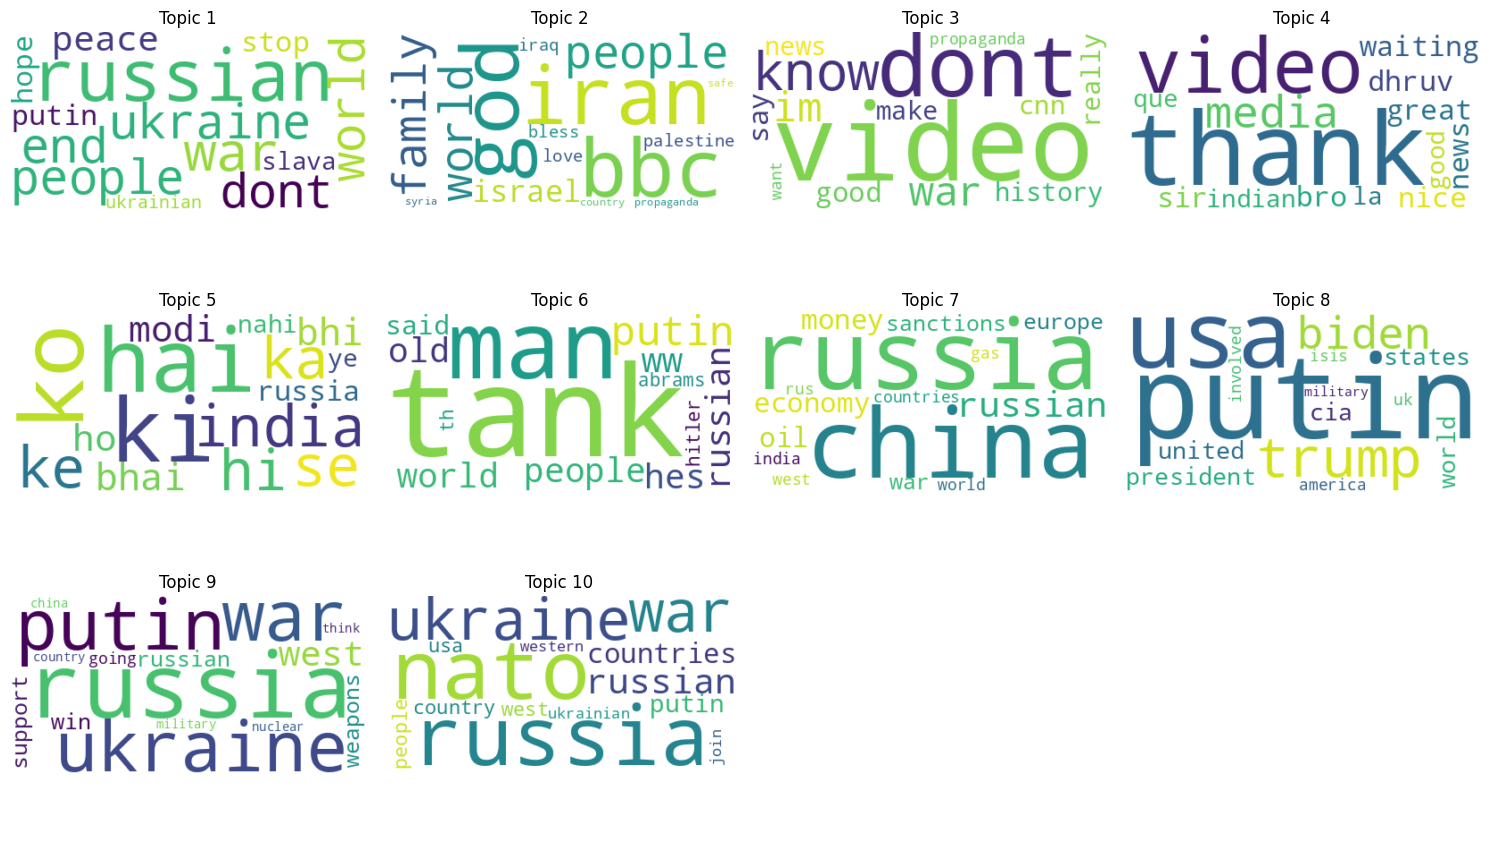

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds for topics from scikit-learn's LDA model
def generate_word_clouds(lda_model, feature_names, num_topics, num_words=10):
    num_rows = (num_topics + 3) // 4  # Calculating the number of rows required
    num_cols = min(num_topics, 4)  # Calculating the number of columns, maximum 4
    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 3))  # Creating subplots

    # Iterate over each topic
    for i, topic in enumerate(lda_model.components_):
        row = i // 4  # Calculating the row index
        col = i % 4  # Calculating the column index

        # Geting top words for the current topic
        top_word_indices = topic.argsort()[:-num_words - 1:-1]
        top_words = [feature_names[idx] for idx in top_word_indices]
        wordcloud_text = ' '.join(top_words)

        # Creating word cloud
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(wordcloud_text)

        # Plotting word cloud
        ax = axes[row, col]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {i + 1}')
        ax.axis('off')

    # Hiding unused subplots
    for i in range(num_topics, num_rows * 4):
        row = i // 4
        col = i % 4
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


generate_word_clouds(LDA, feature_names=count_vect.get_feature_names_out(), num_topics=10, num_words=15)


In [ ]:
import random

for i in range(10):
  #randomly fetch 10 word ids using the get_feature_names() method
    random_id = random.randint(0,len(count_vect.get_feature_names_out()))
    print(count_vect.get_feature_names_out()[random_id])

euch
emotion
penny
wealthy
evolution
needlessly
petroruble
voices
stan
krivorozsk


In [ ]:
first_topic = LDA.components_[0]

top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(count_vect.get_feature_names_out()[i])

like
russians
peace
dont
end
russian
world
ukraine
people
war


In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['like', 'russians', 'peace', 'dont', 'end', 'russian', 'world', 'ukraine', 'people', 'war']


Top 10 words for topic #1:
['love', 'bless', 'palestine', 'israel', 'world', 'family', 'people', 'bbc', 'iran', 'god']


Top 10 words for topic #2:
['news', 'history', 'say', 'good', 'like', 'war', 'im', 'know', 'dont', 'video']


Top 10 words for topic #3:
['news', 'sir', 'nice', 'dhruv', 'great', 'thanks', 'thank', 'waiting', 'media', 'video']


Top 10 words for topic #4:
['bhi', 'bhai', 'hi', 'se', 'ke', 'ka', 'india', 'ko', 'ki', 'hai']


Top 10 words for topic #5:
['hes', 'old', 'tanks', 'russian', 'ww', 'world', 'people', 'putin', 'man', 'like']


Top 10 words for topic #6:
['countries', 'war', 'europe', 'sanctions', 'money', 'oil', 'economy', 'russian', 'china', 'russia']


Top 10 words for topic #7:
['cia', 'world', 'states', 'united', 'president', 'like', 'biden', 'trump', 'usa', 'putin']


Top 10 words for topic #8:
['going', 'weapons', 'win', 'support', '

In [ ]:
for i,topic in enumerate(LDA_Advanced.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [ ]:
topic_values = LDA_Advanced.transform(doc_term_matrix)
topic_values.shape
dataset['Topic'] = topic_values.argmax(axis=1)
dataset[16000:16010]

KeyboardInterrupt: 

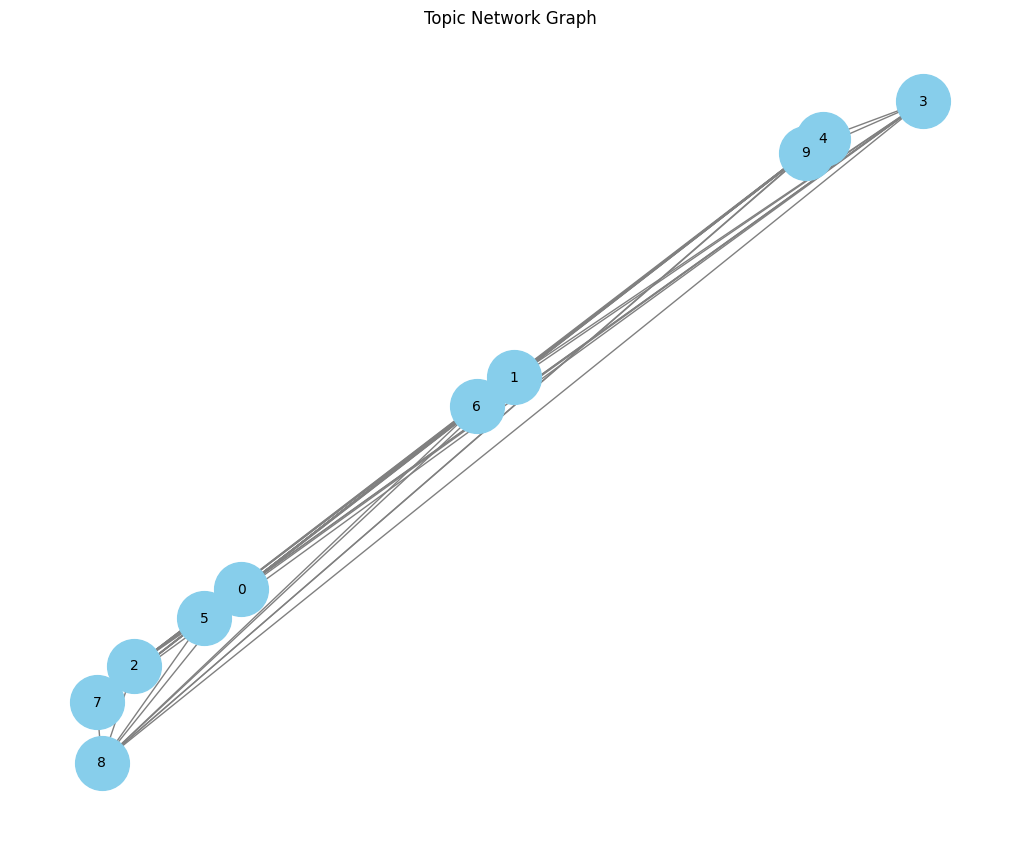

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Get the topic-term distribution from the LDA model
topic_term_dists = LDA.components_

# Define a function to create edges between topics based on their similarity
def create_edges(topic_term_dists, threshold=0.1):
    num_topics, num_terms = topic_term_dists.shape
    edges = []
    for i in range(num_topics):
        for j in range(i + 1, num_topics):
            similarity = np.dot(topic_term_dists[i], topic_term_dists[j])
            if similarity > threshold:
                edges.append((i, j, similarity))
    return edges

# Create edges between topics based on their similarity
edges = create_edges(topic_term_dists)

# Create a directed graph
G = nx.Graph()

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10)
plt.title('Topic Network Graph')
plt.show()


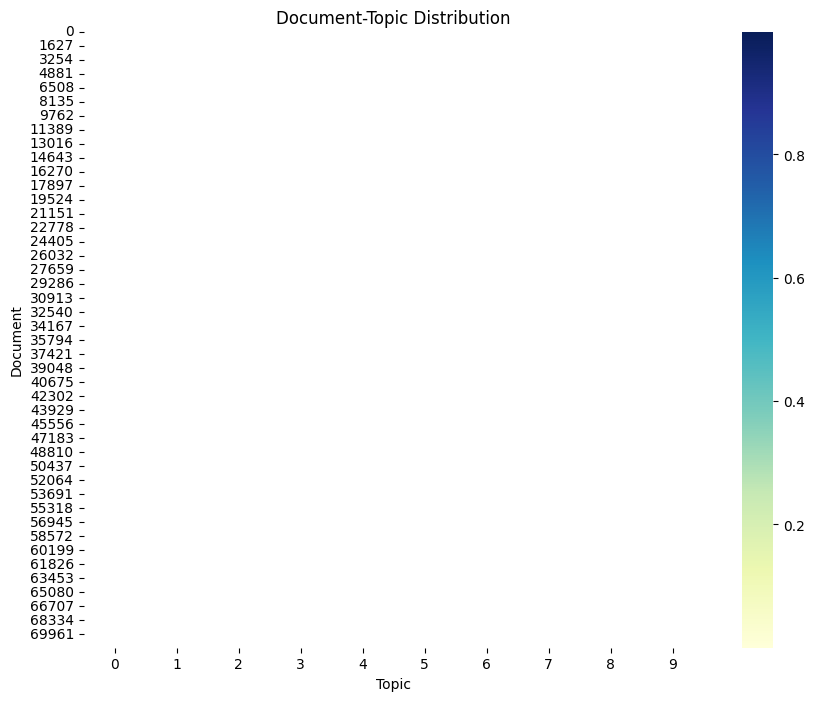

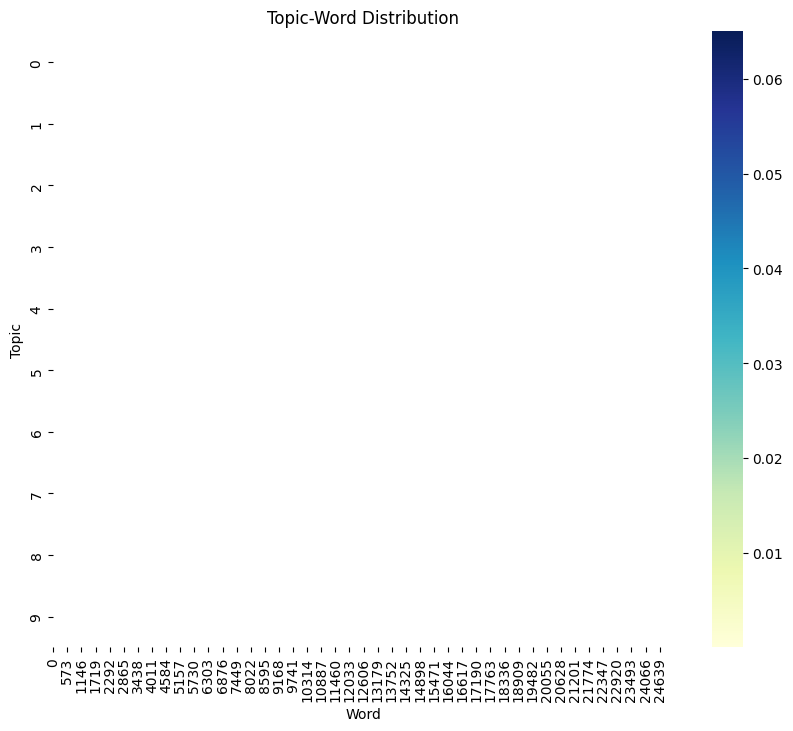

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Get the document-term matrix
doc_term_matrix = count_vect.transform(dataset['text'].values.astype('U'))

# Get the document-topic distribution matrix
doc_topic_dist = LDA.transform(doc_term_matrix)

# Visualize the Document-Topic Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(doc_topic_dist, cmap="YlGnBu", linewidths=0.1)
plt.title('Document-Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.show()

# Get the topic-word distribution matrix
topic_word_dist = LDA.components_ / LDA.components_.sum(axis=1)[:, np.newaxis]  # Normalize to get probabilities

# Visualize the Topic-Word Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(topic_word_dist, cmap="YlGnBu", linewidths=0.1)
plt.title('Topic-Word Distribution')
plt.xlabel('Word')
plt.ylabel('Topic')
plt.show()


In [ ]:
!pip install  pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Create a dictionary and a corpus
dictionary = Dictionary(dataset['text'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in dataset['text']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

# Visualize the LDA model
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


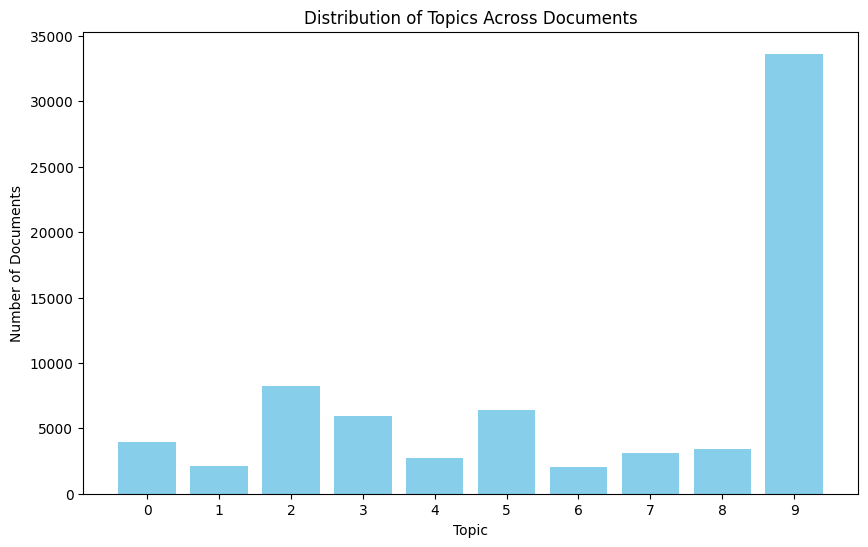

In [ ]:
# Plot the distribution of topics across the documents
topic_distribution = [lda_model[doc] for doc in corpus]
topics = [sorted(t, key=lambda x: x[1], reverse=True)[0][0] for t in topic_distribution]
topic_counts = {topic: topics.count(topic) for topic in range(lda_model.num_topics)}

plt.figure(figsize=(10, 6))
plt.bar(topic_counts.keys(), topic_counts.values(), color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics Across Documents')
plt.xticks(list(topic_counts.keys()))
plt.show()

In [10]:
import numpy as np
from gensim.matutils import Sparse2Corpus
from gensim.models import CoherenceModel

# Convert sparse matrix to corpus (gensim format)
corpus_gensim = Sparse2Corpus(doc_term_matrix.transpose())

# Convert CountVectorizer vocabulary to gensim dictionary
id2word = dict((v, k) for k, v in count_vect.vocabulary_.items())

# Compute perplexity
perplexity = LDA.perplexity(doc_term_matrix)
print("Perplexity:", perplexity)

# Get the topic-word distributions from the LDA model
topic_word_distributions = LDA.components_

# Get the vocabulary from CountVectorizer
vocabulary = count_vect.get_feature_names_out()

# Define the number of top words to consider for each topic
top_words_per_topic = 10

# Extract the top words for each topic
top_words_for_topics = []
for topic_distribution in topic_word_distributions:
    top_word_indices = topic_distribution.argsort()[-top_words_per_topic:][::-1]
    top_words = [vocabulary[index] for index in top_word_indices]
    top_words_for_topics.append(top_words)

# Print top words for each topic
for i, top_words in enumerate(top_words_for_topics):
    print(f"Topic {i+1}: {', '.join(top_words)}")

# Calculate coherence manually (e.g., using your preferred coherence measure)
# coherence_score = your_coherence_calculation(top_words_for_topics)



Perplexity: 3150.7839789661407
Topic 1: war, people, ukraine, world, russian, end, dont, peace, russians, like
Topic 2: god, iran, bbc, people, family, world, israel, palestine, bless, love
Topic 3: video, dont, know, im, war, like, good, say, history, news
Topic 4: video, media, waiting, thank, thanks, great, dhruv, nice, sir, news
Topic 5: hai, ki, ko, india, ka, ke, se, hi, bhai, bhi
Topic 6: like, man, putin, people, world, ww, russian, tanks, old, hes
Topic 7: russia, china, russian, economy, oil, money, sanctions, europe, war, countries
Topic 8: putin, usa, trump, biden, like, president, united, states, world, cia
Topic 9: russia, ukraine, putin, war, west, russian, support, win, weapons, going
Topic 10: nato, russia, ukraine, war, russian, countries, putin, country, people, usa


In [26]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Define a function to calculate perplexity
def calculate_perplexity(model, doc_term_matrix):
    # Compute log likelihood of the documents given the model
    log_likelihood_score = model.score(doc_term_matrix)
    # Convert log likelihood to perplexity
    perplexity = np.exp(-log_likelihood_score / doc_term_matrix.shape[0])
    return perplexity

# Initialize CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')

# Transform the dataset into a document-term matrix
doc_term_matrix = count_vect.fit_transform(dataset['text'].values.astype('U'))

# Initialize and fit Latent Dirichlet Allocation (LDA) model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(doc_term_matrix)

# Calculate perplexity for LDA model
perplexity_lda = calculate_perplexity(lda_model, doc_term_matrix)
print("Perplexity for LDA:", perplexity_lda)

# Initialize and fit Non-Negative Matrix Factorization (NMF) model
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(doc_term_matrix)

# Calculate perplexity for NMF model
perplexity_nmf = calculate_perplexity(nmf_model, doc_term_matrix)
print("Perplexity for NMF:", perplexity_nmf)


Perplexity for LDA: 6.661170653555116e+42


AttributeError: 'NMF' object has no attribute 'score'

In [21]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Initialize CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')

# Transform the dataset into a document-term matrix
doc_term_matrix = count_vect.fit_transform(dataset['text'].values.astype('U'))

# Initialize and fit BERTopic model
bertopic_model = BERTopic()
topics, _ = bertopic_model.fit_transform(dataset['text'])

# Get top words for each topic
topic_words = bertopic_model.get_topic_info()

# Print top words for each topic
for i, (topic_id, topic_info) in enumerate(topic_words.iterrows()):
    print(f"Topic {topic_id}: {topic_info['words']}")

# Calculate coherence
def calculate_coherence(top_words):
    # Compute cosine similarity between word embeddings
    word_embeddings = bertopic_model.transformer_model.encode(top_words)
    normalized_embeddings = normalize(word_embeddings)
    similarity_matrix = cosine_similarity(normalized_embeddings)

    # Compute coherence
    coherence = np.mean(similarity_matrix)
    return coherence

coherence_score = calculate_coherence(topic_words['words'])
print("Coherence Score:", coherence_score)


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like sentence-transformers/all-MiniLM-L6-v2 is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [25]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import numpy as np

# Initialize CountVectorizer
# count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
# Initialize CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')

# Transform the dataset into a document-term matrix
doc_term_matrix = count_vect.fit_transform(dataset['text'].values.astype('U'))

# Initialize and fit LSA model
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(doc_term_matrix)

# Get feature names from CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Get top words for each topic
top_words_per_topic = []
for topic in lsa_model.components_:
    top_word_indices = topic.argsort()[-10:][::-1]  # Get indices of top 10 words
    top_words = [feature_names[i] for i in top_word_indices]  # Get top words
    top_words_per_topic.append(top_words)

# Print top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i+1}: {', '.join(top_words)}")

# Calculate coherence
# Calculate coherence
def calculate_coherence(top_words_list):
    coherence_scores = []
    for top_words in top_words_list:
        # Compute cosine similarity between word embeddings
        word_embeddings = np.array([count_vect.transform([word]).toarray()[0] for word in top_words])
        normalized_embeddings = normalize(word_embeddings)
        similarity_matrix = cosine_similarity(normalized_embeddings)

        # Compute coherence for this set of top words
        coherence = np.mean(similarity_matrix)
        coherence_scores.append(coherence)

    # Return average coherence score
    return np.mean(coherence_scores)

coherence_score = calculate_coherence(top_words_per_topic)
print("Coherence Score:", coherence_score)



Topic 1: russia, ukraine, war, nato, russian, people, putin, world, like, country
Topic 2: ukraine, war, antichrist, people, globalist, world, nazi, racist, russian, zelensky
Topic 3: ukraine, nato, ukrainian, crimea, territory, join, soviet, poland, border, slava
Topic 4: antichrist, russia, globalist, nazi, bless, russiagod, racist, america, world, zionists
Topic 5: bless, russiagod, war, putin, nato, god, end, dont, military, russians
Topic 6: people, russian, putin, like, world, dont, russians, ukrainian, rus, country
Topic 7: libertad, ucrania, totalmente, la, el, para, ser, pueblo, bendiciones, su
Topic 8: russian, war, russia, rus, ukraine, ukrainian, kiev, russians, ukrainians, history
Topic 9: world, ukraine, china, people, place, country, countries, th, india, europe
Topic 10: nato, russian, people, usa, bbc, propaganda, countries, world, ukrainian, china
Coherence Score: 0.1
